In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
import os

In [3]:
load_dotenv()
path = os.path.expanduser(os.getenv('ipca'))
df = pd.read_excel(path)
df

,ano,mes,desemprego,confianca,ipca
0,2002,3,12.9,91.30,0.60
1,2002,4,12.5,96.00,0.80
2,2002,5,11.9,96.15,0.21
3,2002,6,11.6,84.40,0.42
4,2002,7,11.9,93.81,1.19
...,...,...,...,...,...
163,2015,10,7.8,88.77,0.82
164,2015,11,7.5,85.55,1.01
165,2015,12,6.9,87.17,0.96
166,2016,1,7.6,89.04,1.27


In [4]:
cols = ['year', 'month']
def make_period(row, df):
    year = row['ano']
    month = row['mes']
    try:
        date = pd.to_datetime({'year': [year], 'month': [month], 'day': [1]})[0]
        return date
    except ValueError:
        return pd.NaT

df['period'] = df.apply(lambda row: make_period(row, df), axis=1)

df

,ano,mes,desemprego,confianca,ipca,period
0,2002,3,12.9,91.30,0.60,2002-03-01
1,2002,4,12.5,96.00,0.80,2002-04-01
2,2002,5,11.9,96.15,0.21,2002-05-01
3,2002,6,11.6,84.40,0.42,2002-06-01
4,2002,7,11.9,93.81,1.19,2002-07-01
...,...,...,...,...,...,...
163,2015,10,7.8,88.77,0.82,2015-10-01
164,2015,11,7.5,85.55,1.01,2015-11-01
165,2015,12,6.9,87.17,0.96,2015-12-01
166,2016,1,7.6,89.04,1.27,2016-01-01


In [19]:
ipca = df[['ipca']].values
desvio_padrao = np.std(ipca)
desvio_padrao

np.float64(0.39370939303984154)

C:\Users\joao.santos\AppData\Local\Temp\ipykernel_26656\2684793573.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


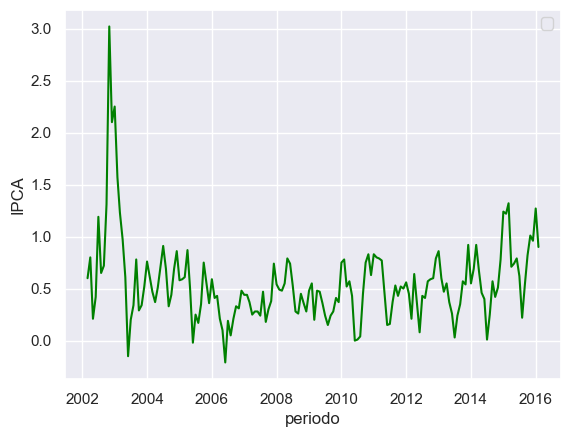

In [16]:
sns.set_theme(style="darkgrid")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.lineplot(data=df, x='period', y='ipca', color='green')
ax.set_xlabel('periodo')
ax.set_ylabel('IPCA')
ax.legend()
plt.show()

C:\Users\joao.santos\AppData\Local\Temp\ipykernel_26656\2916680544.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


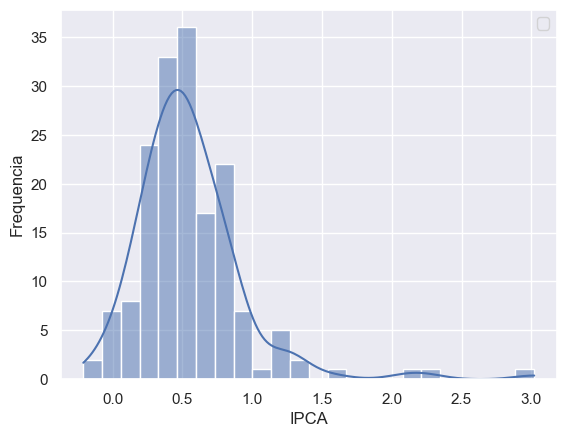

In [15]:
# is this variable normally distributed? Let's see graphycally
index = df[['ipca']].values
sns.set_theme(style="darkgrid")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.histplot(index, kde=True, color='gray')
ax.set_xlabel('IPCA')
ax.set_ylabel('Frequencia')
ax.legend()
plt.show()